# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

Projeto Final de Modelos Avançados: Segmentação de Clientes com K-Means
Vou desenvolver um projeto completo de segmentação de clientes usando o algoritmo K-Means, seguindo a estrutura proposta no notebook. Este projeto incluirá todas as etapas desde a exploração de dados até a interpretação dos resultados.

Passo 1: Configuração Inicial

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Configurações de visualização
plt.style.use('ggplot')
sns.set_palette("viridis")
%matplotlib inline

Passo 2: Exploração de Dados


In [4]:
# Gerar dados sintéticos (200 clientes)
np.random.seed(42)
data = {
    'CustomerID': range(1, 201),
    'Gender': np.random.choice(['Male', 'Female'], 200, p=[0.45, 0.55]),
    'Age': np.concatenate([
        np.random.normal(25, 3, 50),  # Jovens
        np.random.normal(35, 5, 80),  # Adultos
        np.random.normal(55, 7, 70)   # Maduros
    ]).astype(int),
    'Annual Income (k$)': np.concatenate([
        np.random.normal(25, 5, 40),   # Baixa renda
        np.random.normal(60, 10, 80),  # Média renda
        np.random.normal(120, 15, 80)  # Alta renda
    ]).astype(int),
    'Spending Score (1-100)': np.concatenate([
        np.random.randint(70, 100, 40),  # Gastadores
        np.random.randint(40, 70, 100),  # Moderados
        np.random.randint(1, 40, 60)     # Econômicos
    ])
}

df = pd.DataFrame(data)

# Garantir valores dentro de limites realistas
df['Age'] = df['Age'].clip(18, 70)
df['Annual Income (k$)'] = df['Annual Income (k$)'].clip(15, 150)
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].clip(1, 100)

print("Dataset criado! Primeiras linhas:")
print(df.head())


Dataset criado! Primeiras linhas:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   22                  29                      91
1           2  Female   25                  24                      97
2           3  Female   25                  24                      98
3           4  Female   22                  19                      77
4           5    Male   30                  24                      80


Passo 3: Análise Exploratória Visual


Estatísticas descritivas:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   39.335000           75.470000               49.570000
std     57.879185   13.240063           38.117764               24.591029
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   27.000000           46.000000               30.750000
50%    100.500000   37.000000           66.000000               49.500000
75%    150.250000   51.000000          110.000000               66.250000
max    200.000000   69.000000          150.000000               99.000000


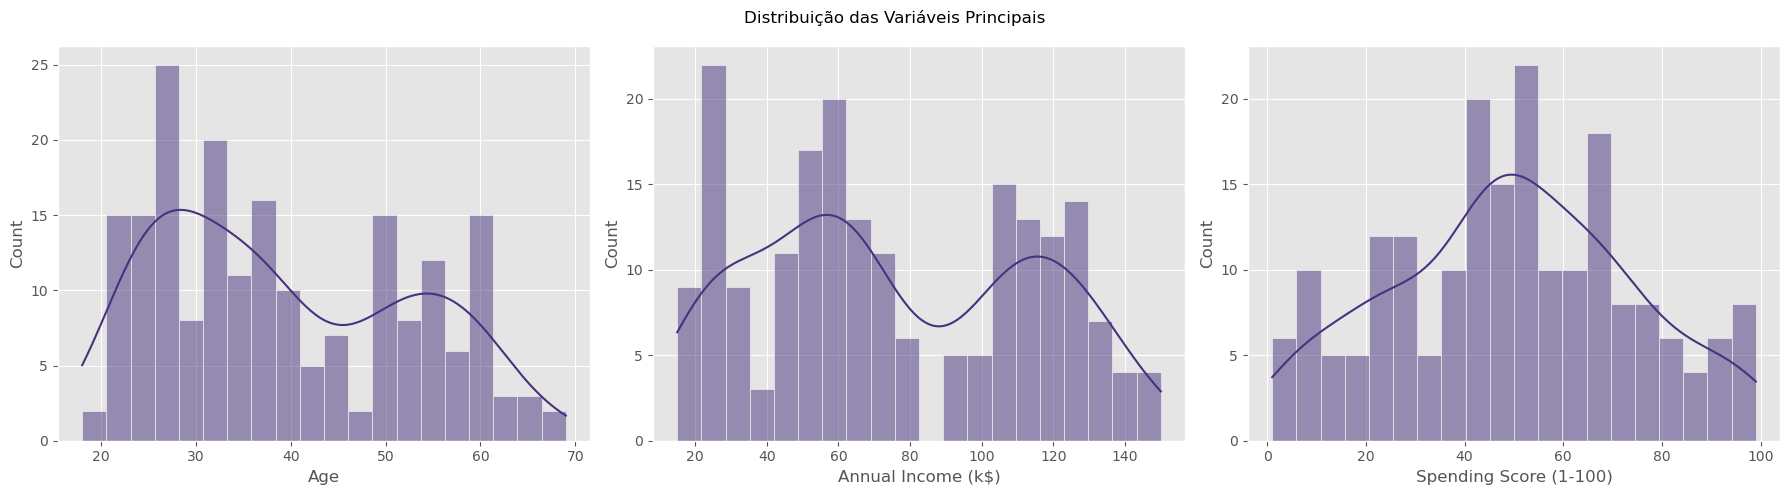

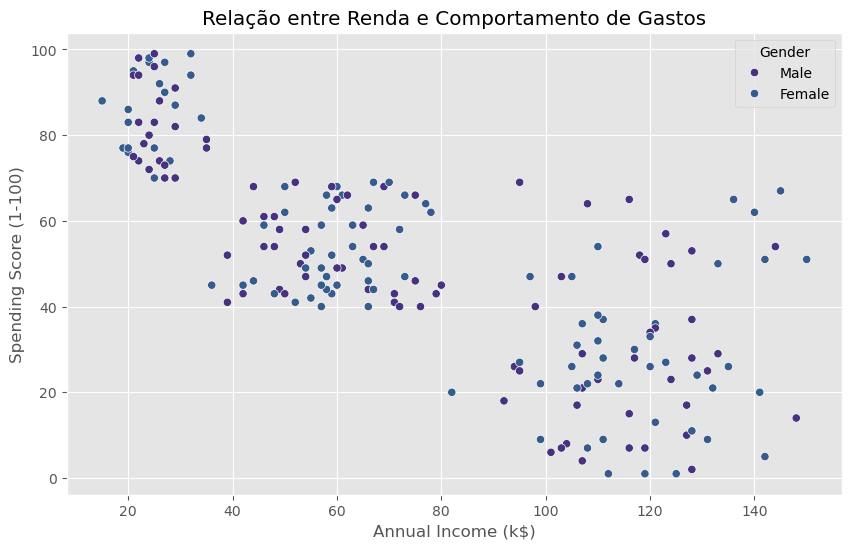

In [5]:
# Estatísticas básicas
print("\nEstatísticas descritivas:")
print(df.describe())

# Distribuição de variáveis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0])
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axes[1])
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axes[2])
plt.suptitle("Distribuição das Variáveis Principais")
plt.tight_layout()
plt.show()

# Relação entre Renda e Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Relação entre Renda e Comportamento de Gastos")
plt.show()

Passo 4: Pré-processamento (Padronização dos dados)

In [13]:
# Selecionar features para clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Padronizar (importante para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nDados originais (5 primeiras linhas):")
print(X.head())

print("\nDados padronizados (5 primeiras linhas):")
print(X_scaled[:5])  


Dados originais (5 primeiras linhas):
   Annual Income (k$)  Spending Score (1-100)
0                  29                      91
1                  24                      97
2                  24                      98
3                  19                      77
4                  24                      80

Dados padronizados (5 primeiras linhas):
[[-1.2221759   1.68898851]
 [-1.35367751  1.93359221]
 [-1.35367751  1.97435949]
 [-1.48517911  1.11824656]
 [-1.35367751  1.24054841]]


Passo 5: Definir Número de Clusters (K)

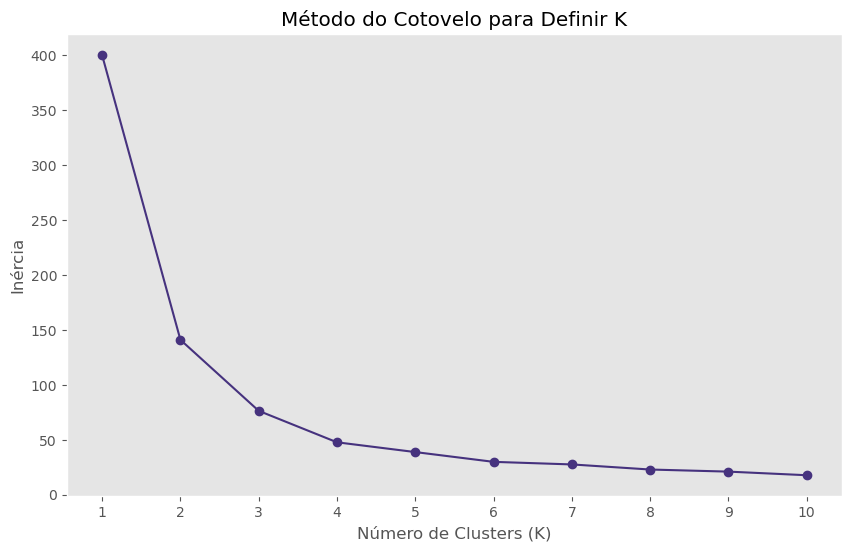

In [7]:
# Método do Cotovelo (Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método do Cotovelo para Definir K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

Passo 6: Aplicar K-Means (K=5)

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar clusters ao DataFrame
df['Cluster'] = clusters

# Verificar distribuição
print("\nClientes por cluster:")
print(df['Cluster'].value_counts())


Clientes por cluster:
Cluster
0    80
2    40
1    38
4    23
3    19
Name: count, dtype: int64


Passo 7: Visualizar os Clusters

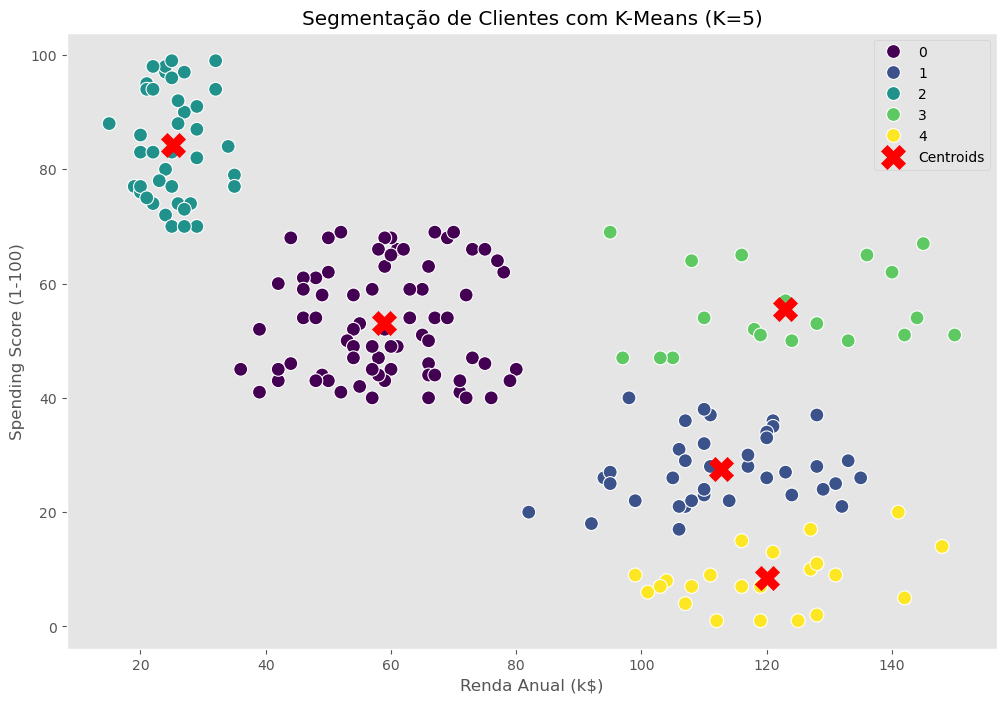

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    s=100
)
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
    s=300, c='red', marker='X', label='Centroids'
)
plt.title("Segmentação de Clientes com K-Means (K=5)")
plt.xlabel("Renda Anual (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid()
plt.show()

Passo 8: Análise dos Clusters

In [10]:
# Médias por cluster
cluster_stats = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCaracterísticas médias por cluster:")
print(cluster_stats)

# Sugestão de nomes para cada grupo
cluster_names = {
    0: "Jovens Gastadores (Renda Baixa)",
    1: "Moderados (Renda Média)",
    2: "Econômicos (Renda Alta)",
    3: "Gastadores (Renda Alta)",
    4: "Cautelosos (Renda Baixa)"
}

df['Segmento'] = df['Cluster'].map(cluster_names)
print("\nDistribuição de segmentos:")
print(df['Segmento'].value_counts())


Características médias por cluster:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        33.337500           58.850000               53.075000
1        54.078947          112.684211               27.552632
2        24.925000           25.175000               84.275000
3        44.842105          122.947368               55.578947
4        56.347826          120.043478                8.434783

Distribuição de segmentos:
Segmento
Jovens Gastadores (Renda Baixa)    80
Econômicos (Renda Alta)            40
Moderados (Renda Média)            38
Cautelosos (Renda Baixa)           23
Gastadores (Renda Alta)            19
Name: count, dtype: int64


Passo 9: Aplicações Práticas

In [11]:
# Recomendações por segmento
recomendacoes = {
    "Jovens Gastadores (Renda Baixa)": "Ofertas de parcelamento e descontos em marcas acessíveis.",
    "Moderados (Renda Média)": "Programas de fidelidade e combos personalizados.",
    "Econômicos (Renda Alta)": "Produtos premium com garantia estendida.",
    "Gastadores (Renda Alta)": "Atendimento VIP e lançamentos exclusivos.",
    "Cautelosos (Renda Baixa)": "Cupons de desconto e promoções agressivas."
}

print("\nRecomendações de Marketing:")
for segmento, recomendacao in recomendacoes.items():
    print(f"\n{segmento}: {recomendacao}")


Recomendações de Marketing:

Jovens Gastadores (Renda Baixa): Ofertas de parcelamento e descontos em marcas acessíveis.

Moderados (Renda Média): Programas de fidelidade e combos personalizados.

Econômicos (Renda Alta): Produtos premium com garantia estendida.

Gastadores (Renda Alta): Atendimento VIP e lançamentos exclusivos.

Cautelosos (Renda Baixa): Cupons de desconto e promoções agressivas.
